# **Facebook Friend Recommendation**

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/MyDrive


### 1.Importing module

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

import networkx as nx

In [ ]:
g = nx.read_edgelist('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_woheader.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


### Note:
- this train_woheader.csv is read as directed graph. 
1. indegree --> the number of vertices comes into one node
2. outdegree --> the number of vertices going out from a node

### 1.1 Display subgraph

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


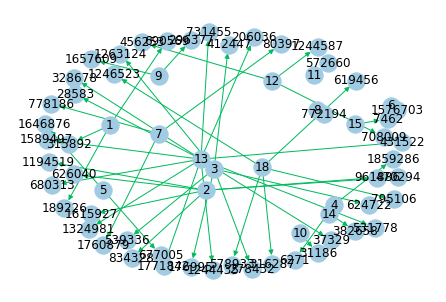

In [ ]:
if not os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/sample_train.csv'):
    pd.read_csv('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train.csv', nrows=50).to_csv('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/sample_train.csv',header=False,index=False)
    
subgraph=nx.read_edgelist('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/sample_train.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
# https://stackoverflow.com/questions/9402255/drawing-a-huge-graph-with-networkx-and-matplotlib

pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
print(nx.info(subgraph))

## 2. EDA
- indegrees --> No of followers for each person
- outdegrees --> no of person he/she followed
- degrees --> indegree + outdegree

In [ ]:
print('The number of unique persons :', len(g.nodes()))

The number of unique persons : 1862220


### 2.1No of followers for each person

In [ ]:
dict(g.in_degree())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
indegree_list = list(dict(g.in_degree()).values())
indegree_list.sort()

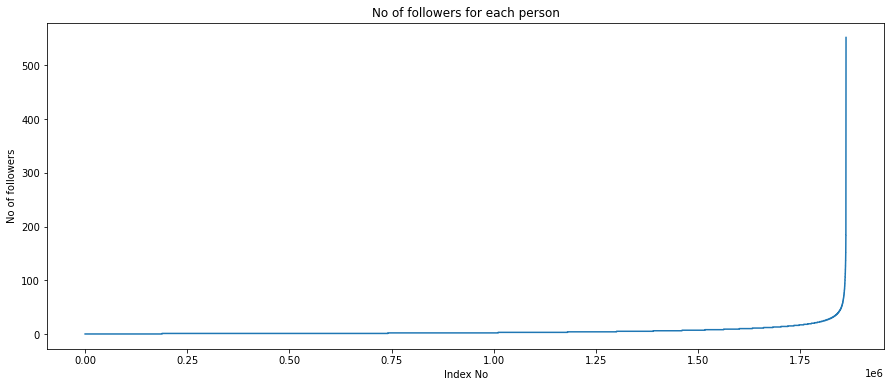

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(indegree_list)
plt.title('No of followers for each person')
plt.xlabel('Index No')
plt.ylabel('No of followers')
plt.show()

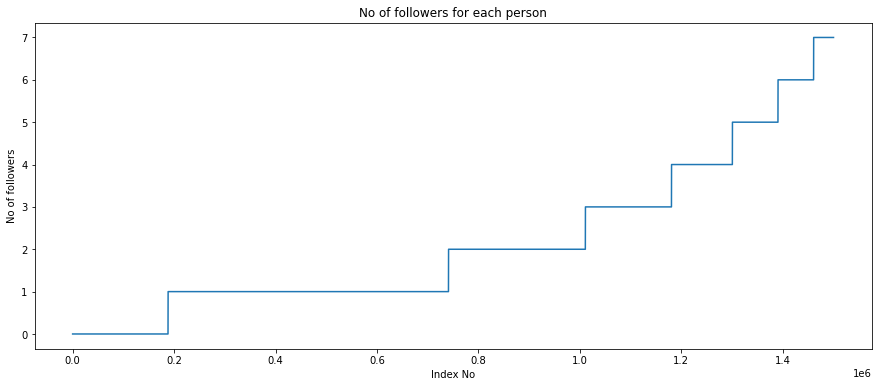

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(indegree_list[0:1500000])
plt.title('No of followers for each person')
plt.xlabel('Index No')
plt.ylabel('No of followers')
plt.show()

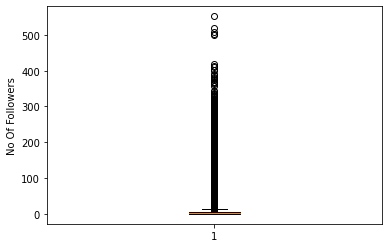

In [ ]:
plt.boxplot(indegree_list)
plt.ylabel('No Of Followers')
plt.show()

In [ ]:
for i in range(90,101):
    print(f'the {i}th percentile value is:',np.percentile(indegree_list,i))

the 90th percentile value is: 12.0
the 91th percentile value is: 13.0
the 92th percentile value is: 14.0
the 93th percentile value is: 15.0
the 94th percentile value is: 17.0
the 95th percentile value is: 19.0
the 96th percentile value is: 21.0
the 97th percentile value is: 24.0
the 98th percentile value is: 29.0
the 99th percentile value is: 40.0
the 100th percentile value is: 552.0


In [ ]:
for i in range(10,110,10):
    print(f'the {99+(i/100)}th percentile value is:',np.percentile(indegree_list,99+(i/100)))

the 99.1th percentile value is: 42.0
the 99.2th percentile value is: 44.0
the 99.3th percentile value is: 47.0
the 99.4th percentile value is: 50.0
the 99.5th percentile value is: 55.0
the 99.6th percentile value is: 61.0
the 99.7th percentile value is: 70.0
the 99.8th percentile value is: 84.0
the 99.9th percentile value is: 112.0
the 100.0th percentile value is: 552.0


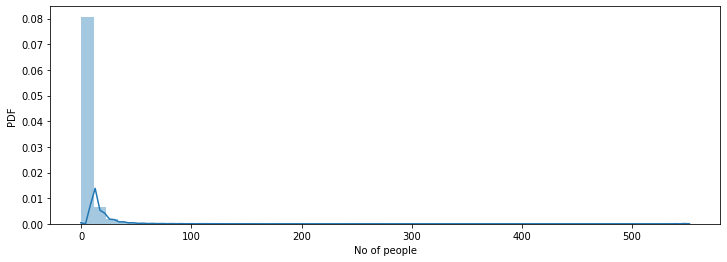

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(indegree_list)
plt.xlabel('No of people')
plt.ylabel('PDF')
plt.show()

### 2.2No of person each person following

In [ ]:
outdegree_list = list(dict(g.out_degree()).values())
outdegree_list.sort()

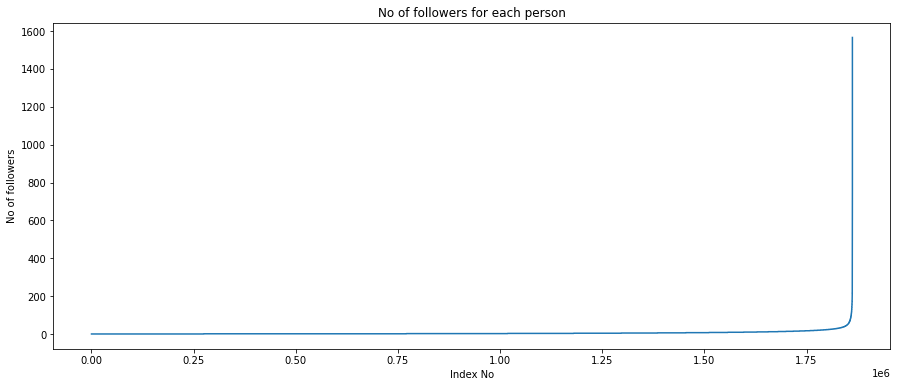

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(outdegree_list)
plt.title('No of followers for each person')
plt.xlabel('Index No')
plt.ylabel('No of followers')
plt.show()

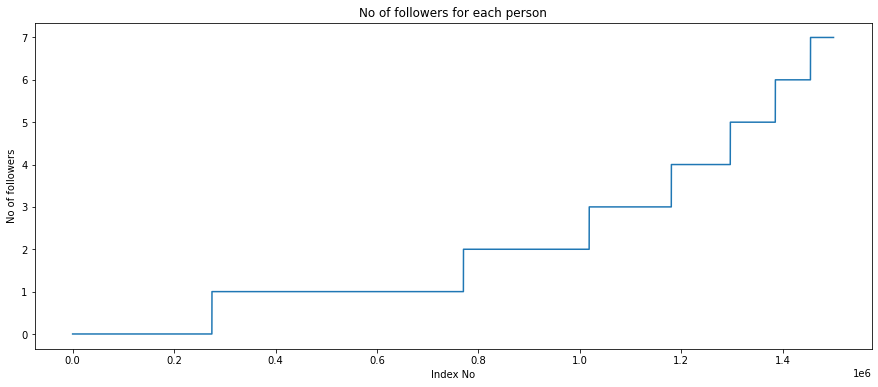

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(outdegree_list[0:1500000])
plt.title('No of followers for each person')
plt.xlabel('Index No')
plt.ylabel('No of followers')
plt.show()

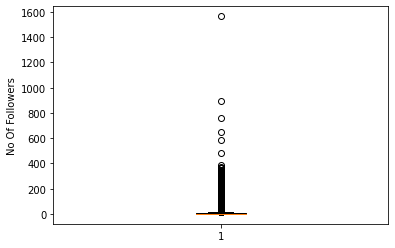

In [ ]:
plt.boxplot(outdegree_list)
plt.ylabel('No Of Followers')
plt.show()

In [ ]:
for i in range(90,101):
    print(f'the {i}th percentile value is:',np.percentile(outdegree_list,i))

the 90th percentile value is: 12.0
the 91th percentile value is: 13.0
the 92th percentile value is: 14.0
the 93th percentile value is: 15.0
the 94th percentile value is: 17.0
the 95th percentile value is: 19.0
the 96th percentile value is: 21.0
the 97th percentile value is: 24.0
the 98th percentile value is: 29.0
the 99th percentile value is: 40.0
the 100th percentile value is: 1566.0


In [ ]:
for i in range(10,110,10):
    print(f'the {99+i/100}th percentile value is:',np.percentile(outdegree_list,99+i/100))

the 99.1th percentile value is: 42.0
the 99.2th percentile value is: 45.0
the 99.3th percentile value is: 48.0
the 99.4th percentile value is: 52.0
the 99.5th percentile value is: 56.0
the 99.6th percentile value is: 63.0
the 99.7th percentile value is: 73.0
the 99.8th percentile value is: 90.0
the 99.9th percentile value is: 123.0
the 100.0th percentile value is: 1566.0


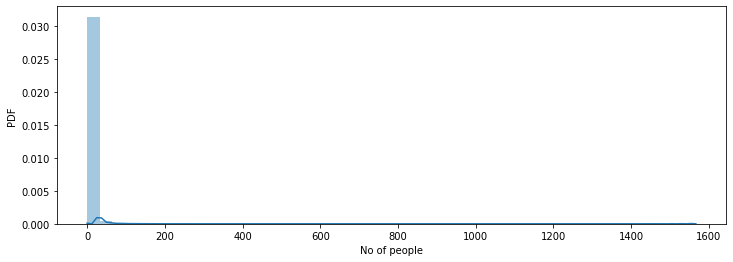

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(outdegree_list)
plt.xlabel('No of people')
plt.ylabel('PDF')
plt.show()

### 2.3Both followers and following

In [ ]:
dict_indegree = dict(g.in_degree())
dict_outdegree = dict(g.out_degree())

In [ ]:
from collections import Counter
d = Counter(dict_indegree) + Counter(dict_outdegree)
in_out_degree = np.array(list(d.values()))
in_out_degree_sorted = sorted(in_out_degree)

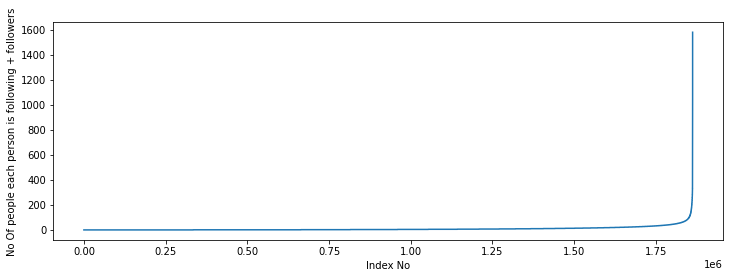

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(in_out_degree_sorted)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

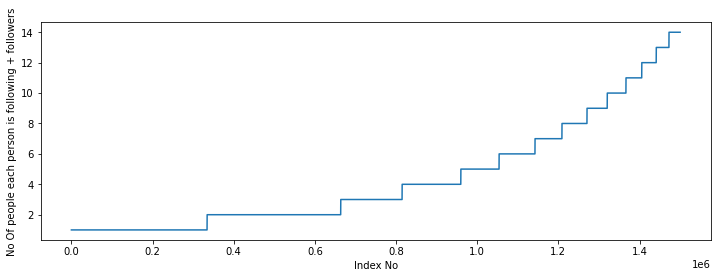

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(in_out_degree_sorted[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [ ]:
for i in range(90,101):
    print(f'the {i}th percentile value is:',np.percentile(in_out_degree_sorted,i))

the 90th percentile value is: 24.0
the 91th percentile value is: 26.0
the 92th percentile value is: 28.0
the 93th percentile value is: 31.0
the 94th percentile value is: 33.0
the 95th percentile value is: 37.0
the 96th percentile value is: 41.0
the 97th percentile value is: 48.0
the 98th percentile value is: 58.0
the 99th percentile value is: 79.0
the 100th percentile value is: 1579.0


In [ ]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sorted,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [ ]:
print('Min no of follower + following:', in_out_degree.min())
print('No of people who has minimum follower + following:', np.sum(in_out_degree == in_out_degree.min()))

Min no of follower + following: 1
No of people who has minimum follower + following: 334291


In [ ]:
print('Max no of follower + following is:', in_out_degree.max())
print('No of people who has maximum follower + following:', np.sum(in_out_degree == in_out_degree.max()))

Max no of follower + following is: 1579
No of people who has maximum follower + following: 1


In [ ]:
print('No of persons having followers + following less than 10 are', np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are 1320326


In [ ]:
print('no of weekly connected components:', len(list(nx.weakly_connected_components(g))))

count = 0
for i in list(nx.weakly_connected_components(g)):
    if len(i) == 2:
        count += 1
print('weakly connected components:', count)

no of weekly connected components: 45558
weakly connected components: 32195


## 3.Posing as a classification task

## 3.1 Generating some edges which are not present in graph for supervised learning  
Generated Bad links from graph which are not in graph and whose shortest path is greater than 2. --> that is generating randomly from possible edges(n*(n-1) as each user can connect with n-1 users) which is not present where the length is greater than 2 and put the label as 0 for them.

In [ ]:
os.path.exists(('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of missing_edges_final.p'))

True

In [ ]:
import csv
import pickle
if not os.path.exists('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of missing_edges_final.p'):
    #getting all sets of edges
    r = csv.reader('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_woheader.csv', 'r')

    edges = dict()
    for i in r:
        edges[(i[0], i[1])] = 1  #generating label as 1 for all the training data since the train data refers they have edge between them

    missing_edges = set([]) #generating unique edges
    while (len(missing_edges)>9437519):    #generating the number of random edges same as no of training edges to make it balance
        a = np.random.randint(0, 1862220)  #1.86M unique person is in training 
        b = np.random.randint(0, 1862220)
        tmp = edges.get((a,b), -1) 
        if tmp ==-1 and a!=b:
            try:
                if nx.shortest_path_length(g, source=a, target=b) >2:   # adding only when shortest length >2
                    missing_edge.add((a,b))

                else:
                    continue
            except:
                missing_edges.add((a,b))

        else:
            continue

    pickle.dump(missing_edges,open('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of missing_edges_final.p','wb'))

else:
    missing_edges = pickle.load(open('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of missing_edges_final.p','rb'))

## 4. Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
if (not os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and (not os.path.isfile('data/after_eda/test_pos_after_eda.csv')):
    #reading total data df
    df_pos = pd.read_csv('data/train.csv')
    df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
    print("Number of nodes in the graph with edges", df_pos.shape[0])
    print("Number of nodes in the graph without edges", df_neg.shape[0])
    
    #Trian test split 
    #Spiltted data into 80-20 
    #positive links and negative links seperatly because we need positive training data only for creating graph 
    #and for feature generation
    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
    
    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

    #removing header and saving
    X_train_pos.to_csv('data/after_eda/train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('data/after_eda/test_pos_after_eda.csv',header=False, index=False)
    X_train_neg.to_csv('data/after_eda/train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('data/after_eda/test_neg_after_eda.csv',header=False, index=False)
else:
    #Graph from Traing data only 
    del missing_edges

Number of nodes in the graph with edges 9437519
Number of nodes in the graph without edges 9437519
Number of nodes in the train data graph with edges 7550015 = 7550015
Number of nodes in the train data graph without edges 7550015 = 7550015
Number of nodes in the test data graph with edges 1887504 = 1887504
Number of nodes in the test data graph without edges 1887504 = 1887504


In [ ]:
if (os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and (os.path.isfile('data/after_eda/test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('data/after_eda/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',trY_teY)
    print('no of people present in train but not present in test -- ',trY_teN)

    print('no of people present in test but not present in train -- ',teY_trN)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399
Name: 
Type: DiGraph
Number of nodes: 1144623
Number of edges: 1887504
Average in degree:   1.6490
Average out degree:   1.6490
no of people common in train and test --  1063125
no of people present in train but not present in test --  717597
no of people present in test but not present in train --  81498
 % of people not there in Train but exist in Test in total Test data are 7.1200735962845405 %


## **Note:**
- We now have a cold problem here as some data in test are not in training data

In [ ]:
#final train and test data sets
if (not os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_after_eda.csv')) and \
(not os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of test_after_eda.csv')) and \
(not os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_y.csv')) and \
(not os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of test_y.csv')) and \
(os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_pos_after_eda.csv')) and \
(os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of test_pos_after_eda.csv')) and \
(os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_neg_after_eda.csv')) and \
(os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of test_neg_after_eda.csv')):
    
    X_train_pos = pd.read_csv('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation//train_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation//test_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation//train_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation//test_neg_after_eda.csv', names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
    X_train.to_csv('data/after_eda/train_after_eda.csv',header=False,index=False)
    X_test.to_csv('data/after_eda/test_after_eda.csv',header=False,index=False)
    pd.DataFrame(y_train.astype(int)).to_csv('data/train_y.csv',header=False,index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('data/test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


## 5.Featurization

In [3]:
if os.path.exists('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_pos_after_eda.csv'):
    train_graph = nx.read_edgelist('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_pos_after_eda.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)
    print(nx.info(train_graph))

else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


### 5.1 Jaccard index
- for followers
- for followees
-http://www.statisticshowto.com/jaccard-index/

\begin{equation}
j = \frac{|X\cap Y|}{|X \cup Y|} 
\end{equation}

- successors() and neighbors() are the same function
- for followee use successor
- for followers use predecessors
- Refer : a-->b--->c, now for b, follower of b is a (predecessor of b), followee of b is c(successor of b). For followee of a node x you consider successor of node x.
In the above statement it was said " when we are interested in 'followee' i.e all edges are directed towards it then predecessor gives us that list", means if you want to know the number of followers of followee, you will check for how many predecessors are there for this followee.
In the assignment to calculate jacard_for_followees of a node 'a' you will consider successor of node 'a'. That's it
- Refer : https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.DiGraph.successors.html

#### 5.1.1 For Followers

In [22]:
# if the neighors are 0 then return 0 else return the jaccard index

def jaccard_index_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0| len(set(train_graph.predecessors(b)))==0:
            return 0

        else:
            j_ind = (len(set(train_graph.predecessors(a))).intersection(len(set(train_graph.predecessors(b)))))/ \
                        ((len(set(train_graph.predecessors(a)))).union(len(set(train_graph.predecessors(b)))))

    except:
        return 0
    return j_ind

In [23]:
#one test case
print(jaccard_index_for_followers(273084,1505602))

0


#### 5.1.2 For followees

In [24]:
# if the neighors are 0 then return 0 else return the jaccard index

def jaccard_index_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0| len(set(train_graph.successors(b)))==0:
            return 0

        else:
            j_ind = (len(set(train_graph.successors(a))).intersection(len(set(train_graph.successors(b)))))/ \
                        ((len(set(train_graph.successors(a)))).union(len(set(train_graph.successors(b)))))

    except:
        return 0
    return j_ind

In [25]:
print(jaccard_index_for_followees(273084,470294))

0


### 5.2 Cosine Distance (Otsuka-Ochiai coefficient)
\begin{equation}
CosineDistance = \frac{|X\cap Y|}{sqrt(|X|\cdot|Y|)}
\end{equation}

#### 5.2.1 For Followers

In [26]:
# if the neighors are 0 then return 0 else return the cosine dist
import math

def cosine_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0| len(set(train_graph.predecessors(b)))==0:
            return 0

        else:
            cosine = (len(set(train_graph.predecessors(a))).intersection(len(set(train_graph.predecessors(b)))))/ \
                        (math.sqrt((len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b))))))

    except:
        return 0
    return cosine

In [30]:
print(cosine_for_followers(2,470294))

0


#### 5.2.2 For Followees

In [28]:
# if the neighors are 0 then return 0 else return the distance
import math

def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0| len(set(train_graph.successors(b)))==0:
            return 0

        else:
            cosine = (len(set(train_graph.successors(a))).intersection(len(set(train_graph.successors(b)))))/ \
                        (math.sqrt((len(set(train_graph.successors(a))))*(len(set(train_graph.successors(b))))))

    except:
        return 0
    return cosine

In [29]:
print(cosine_for_followees(2,470294))

0


### 6. Page Rank for users

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links.

<img src='PageRanks-Example.jpg'/>

Mathematical PageRanks for a simple network, expressed as percentages. (Google uses a logarithmic scale.) Page C has a higher PageRank than Page E, even though there are fewer links to C; the one link to C comes from an important page and hence is of high value. If web surfers who start on a random page have an 85% likelihood of choosing a random link from the page they are currently visiting, and a 15% likelihood of jumping to a page chosen at random from the entire web, they will reach Page E 8.1% of the time. <b>(The 15% likelihood of jumping to an arbitrary page corresponds to a damping factor of 85%.) Without damping, all web surfers would eventually end up on Pages A, B, or C, and all other pages would have PageRank zero. In the presence of damping, Page A effectively links to all pages in the web, even though it has no outgoing links of its own.</b>

In [33]:
if not os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of page_rank.p'):
    pr = nx.pagerank(train_graph, alpha=0.85)
    pickle.dump(pr, open('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of page_rank.p', 'wb'))

else:
    pr = pickle.load(open('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of page_rank.p', 'rb'))

In [35]:
print('Min:', pr[min(pr, key=pr.get)])
print('Max:', pr[max(pr, key=pr.get)])
print('mean:', float(sum(pr.values()))/len(pr))

Min: 1.6556497245737814e-07
Max: 2.7098251341935827e-05
mean: 5.615699699389075e-07


In [36]:
#for imputing to nodes which are not there in Train data
mean_pr = float(sum(pr.values())) / len(pr)
print(mean_pr)

5.615699699389075e-07


## 7. Other Graph Features
1. shortest path
2. checking for same community
3. Adamic/ Adar Index
4. Is person following back
5. Katz centrality
6. Hits Score

### 7.1 Shortest path
- Getting Shortest path between two nodes, if nodes have direct path i.e directly connected then we are removing that edge and calculating path. If there is no connection then return -1
- why we are calculating is , if it is short then they would have known each other. So, if the value is low there is more probability that they could be friends

In [37]:
def compute_shortest_path_length(a,b):
    try:
        if train_graph.has_edge(a,b):  #has_edge Returns True if the edge (u, v) is in the graph.
            train_graph.remove_edge(a,b) #since we don't want direct path
            p = nx.shortest_path_length(train_graph, source=a, target=b)  #finding shortest path after remmoved the direct edge
            train_graph.add_edge(a,b)   #since we found the shortest path length we can add the removed path again

        else:
            p = nx.shortest_path_length(train_graph, source=a, target=b)

        return p
    except:
        return -1  #since there is no path b/w them

In [38]:
#testing
compute_shortest_path_length(77697, 826021)

10

### 7.2 Weakly connected components:
- if we ignore the directions, we can reach from any node to any other node. then it is called weakly connected components.
- if we dont ignore the directions and still reach from any node to any other node then it is called strongly connected components.

##### Why we need this?
- Because if (a,b) belongs to weekly connected component which means they share some communtiy (school, college, work,etc). So given two nodes if there is a weekly connected component, they is a probability that they may know each other

In [43]:
#here between nodes(a,b) if they belong to weakly connected component we return 1 

wcc = list(nx.weakly_connected_components(train_graph))
def belongs_to_same_wcc(a,b):
    index = []
    if train_graph.has_edge(b,a):     #if edge b/w b-->a then return 1
        return 1

    if train_graph.has_edge(a,b):    #if edge b/w a-->b, then look at wcc and if a in wcc then save it(index) and come out
        for i in wcc:                
            if a in i:
                index = i
                break

            if b in index:            #if b in saved one(index) remove the edge and if there is no shortest path b/w them then we add the edge and return there do not belong to weekly connected components
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b) #if there is shortest path b/w them then add edge and return 1 as they belong to same community
                    return 1

            else:
                return 0

    else:         #if there is no edge
        for i in wcc:
            if a in i:
                index = i
                break
            
            if b in index:
                return 1
            else:
                return 0
        

In [44]:
belongs_to_same_wcc(861, 1659750)

0

### 7.3 Adamic/Adar Index:
Adamic/Adar measures is defined as inverted sum of degrees of common neighbours for given two vertices.
$$A(x,y)=\sum_{u \in N(x) \cap N(y)}\frac{1}{log(|N(u)|)}$$

In [45]:
def adar_index(a,b):
    sum = 0
    try:
        n = list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))  #finding nighbours of a,b as 'a' followed whom and 'b' followed whom

        if len(n) != 0: #if there is a neighbourhood
            for i in n:
                sum = sum+ (1/(np.log10(len(train_graph.predecessors(i)))))  #finding the number who followed i
            return sum
        else:           #if there is no neighbourhood
            return 0

    except:
          return 0

In [47]:
adar_index(1,189226)

0

### 7.5 Is person follows back:
- ie if there is edge b/w b-->a then return 1

In [48]:
def is_follow_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

In [49]:
is_follow_back(1, 189226)

1

### 7.6 Katz Centrality:
https://en.wikipedia.org/wiki/Katz_centrality

https://www.geeksforgeeks.org/katz-centrality-centrality-measure/
 Katz centrality computes the centrality for a node 
    based on the centrality of its neighbors. It is a 
    generalization of the eigenvector centrality. The
    Katz centrality for node `i` is
 
$$x_i = \alpha \sum_{j} A_{ij} x_j + \beta,$$
where `A` is the adjacency matrix of the graph G 
with eigenvalues $$\lambda$$.

The parameter $$\beta$$ controls the initial centrality and 

$$\alpha < \frac{1}{\lambda_{max}}.$$

In [55]:
if not os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of katz.p'):
    katz = nx.katz.katz_centrality(train_graph, alpha=0.05, beta=1)
    pickle.dump(katz,open('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of katz.p','wb'))

else:
    katz = pickle.load(open('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of katz.p', 'rb'))

In [56]:
print('Min', katz[min(katz, key=katz.get)])
print('Max', katz[max(katz, key=katz.get)])
print('Mean', float(sum(katz.values()))/len(katz))

Min 0.0007313532484065916
Max 0.003394554981699122
Mean 0.0007483800935562018


In [57]:
mean_katz = float(sum(katz.values())) / len(katz)
print(mean_katz)

0.0007483800935562018


### 7.7 Hits Score
The HITS algorithm computes two numbers for a node. Authorities estimates the node value based on the incoming links. Hubs estimates the node value based on outgoing links.

https://en.wikipedia.org/wiki/HITS_algorithm

In [60]:
if not os.path.isfile('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of hits.p'):
    hits = nx.hits(train_graph, max_iter=100, tol=1e-08, normalized=True)
    pickle.dump(katz,open('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of hits.p','wb'))

else:
    hits = pickle.load(open('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of hits.p','rb'))

#### Note:
- hits returns the tuple of (hub, auth)

In [63]:
print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min 0.0
max 0.004868653378780953
mean 5.615699699344123e-07


## 8. Adding all features together

### 8.1 Reading sample of data

In [64]:
import random
if os.path.exists('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_after_eda.csv'):
    filename = '/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_after_eda.csv'
    #n_train = sum(1 for line in open(filename))  #to find the lenght of file excludes header
    n_train = 15100028
    s = 100000 #sample size
    #https://stackoverflow.com/questions/22258491/read-a-small-random-sample-from-a-big-csv-file-into-a-python-data-frame/22259008#22259008
    skip_train = sorted(random.sample(range(1, n_train+1), n_train-s))

In [67]:
if os.path.exists('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of test_after_eda.csv'):
    filename = '/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of test_after_eda.csv'
    #n_test = sum(1 for line in open(filename))
    n_test = 3775006
    s = 50000
    skip_test = sorted(random.sample(range(1, n_test+1), n_test-s))

In [68]:
print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data are",len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data are",len(skip_test))

Number of rows in the train data file: 15100028
Number of rows we are going to elimiate in train data are 15000028
Number of rows in the test data file: 3775006
Number of rows we are going to elimiate in test data are 3725006


In [69]:
df_final_train = pd.read_csv('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_after_eda.csv', skiprows=skip_train, names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of train_y.csv', skiprows=skip_train, names=['indicator_link'])
print(df_final_train.shape)
df_final_train.head()

(100002, 3)


,source_node,destination_node,indicator_link
0,273084,1505602,1
1,1160801,71690,1
2,1664821,922569,1
3,602034,1200986,1
4,651589,888656,1


In [70]:
df_final_test = pd.read_csv('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of test_after_eda.csv', skiprows=skip_test, names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('/content/MyDrive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of test_y.csv', skiprows=skip_test, names=['indicator_link'])
print(df_final_test.shape)
df_final_test.head()

(50002, 3)


,source_node,destination_node,indicator_link
0,848424,784690,1
1,1519975,1264299,1
2,1563413,1756440,1
3,471540,1086897,1
4,182360,205736,1


### 8.2 Adding the features:
<ol>
<li>jaccard_followers</li>
<li>jaccard_followees</li>
<li>cosine_followers</li>
<li>cosine_followees</li>
<li>num_followers_s</li>
<li>num_followees_s</li>
<li>num_followers_d</li>
<li>num_followees_d</li>
<li>inter_followers</li>
<li>inter_followees</li>
</ol>

#### 8.2.1 Finding num_followers_s, num_followees_s, num_followers_d, num_followees_d, inter_followers, inter_followees

In [1]:
def finding_num_follower_ees(final_df):
    num_follower_source = []
    num_followee_source = []
    num_follower_destination = []
    num_followee_destination = []
    intersection_followers = []
    intersection_followee = []

    for i, row in final_df.iterrows():
        try:
            s1 = set(train_graph.predecessors(row['source_node']))
            s2 = set(train_graph.successors(row['source_node']))
            d1 = set(train_graph.predecessors(row['destination_node']))
            d2 = set(train_graph.successors(row['destination_node']))
        except:
            s1 = set()
            s2 = set()
            d1 = set()
            d2 = set()
           
        num_follower_source.append(len(s1))
        num_followee_source.append(len(s2))
        num_follower_destination.append(len(d1))
        num_followee_destination.append(len(d2))
        intersection_followers.append(s1.intersection(d1))
        intersection_followee.appedn(s2.intersection(d2))

    return num_follower_source, num_followee_source, num_follower_destination, num_followee_destination, intersection_followers, intersection_followee

In [4]:
if not os.path.isfile('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage1.h5'):
    #jaccard_index
    df_final_train['jaccard_followers'] = df_final_train.apply(lambda x: jaccard_index_for_followers(x['source_node'], x['destination_node']))
    df_final_train['jaccard_followees'] = df_final_train.apply(lambda x: jaccard_index_for_followers(x['source_node'], x['destination_node']))
    df_final_test['jaccard_folltowers'] = df_final_test.apply(lambda x: jaccard_index_for_followers(x['source_node'], x['destination_node']))
    df_final_test['jaccard_followees'] = df_final_test.apply(lambda x: jaccard_index_for_followers(x['source_node'], x['destination_node']))

    #cosine
    df_final_train['cosine_followers'] = df_final_train.apply(lambda x: cosine_for_followers(x['source_node'], x['destination_node']))
    df_final_train['cosine_followees'] = df_final_train.apply(lambda x: cosine_for_followees(x['source_node'], x['destination_node']))
    df_final_test['cosine_followers'] = df_final_test.apply(lambda x: cosine_for_followers(x['source_node'], x['destination_node']))
    df_final_test['cosien_foloowees'] = df_final_test.apply(lambda x: cosine_for_followees(x['source_node'], x['destination_node']))

    #number of followers & followees
    df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
    df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
    df_final_train['inter_followers'], df_final_train['inter_followees']=  finding_num_follower_ees(df_final_train)

    df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
    df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
    df_final_test['inter_followers'], df_final_test['inter_followees']=   finding_num_follower_ees(df_final_test)

    hdf = pd.HDFStore('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage1.h5')
    hdf.put('train_df', df_final_train, format='table', data_columns=True)
    hdf.put('test_df', df_final_test, format='table', data_columns=True)
    hdf.close()

else:
    df_final_train = pd.read_hdf('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage1.h5', 'train_df', mode='r')
    df_final_test = pd.read_hdf('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage1.h5', 'test_df', mode='r')


### 8.3 Adding features:
1. Adar index
2. is following back
3. belongs to same weekly connected component
4. shortest path between source and destination

In [5]:
if not os.path.exists('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage2.h5'):
    #adar index --> here we put axis=1 as used for 'Objects passed to the function are Series objects whose index is either the DataFrame's index (axis=0) or the DataFrame's columns (axis=1)'
    df_final_train['adar_index'] = df_final_train.apply(lambda x: adar_index(x['source_node'], x['destination_node']), axis=1)
    df_final_test['adar_index'] = df_final_test.apply(lambda x: adar_index(x['source_node', x['destination_node']]), axis=1)

    #follow back
    df_final_train['follows_back'] = df_final_train.apply(lambda x: is_follow_back(x['source_node'], x['destination_node']), axis=1)
    df_final_test['foloows_back'] = df_final_test.apply(lambda x: is_follow_back(x['source_node'], x['destination_node']), axis=1)

    #same weakly component
    df_final_train['same_comp'] = df_final_train.apply(lambda x: belongs_to_same_wcc(x['source_node'], x['destination_node']), axis=1)
    df_final_test['same_comp'] = df_final_test.apply(lambda x: belogns_to_same_wcc(x['source_node'], x['destination_code']), axis=1)

    #shortest path
    df_final_train['shortest_path'] = df_final_train.apply(lambda x: compute_shortest_path_length(x['source_node'], x['destination_node']), axis=1)
    df_final_test['shortest_path'] = df_final_test.apply(lambda x: compute_shortest_path_length(x['source_node'], x['destination_node']), axis=1)

    hdf = pd.HDFStore('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage2.h5')
    hdf.put('train_df', df_final_train, format='table', columns=True)
    hdf.close()

else:
    df_final_train = pd.read_hdf('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage2.h5', 'train_df', mode='r')
    df_final_test = pd.read_hdf('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage2.h5', 'test_df', mode='r')

### 8.4 Adding other features
__we will create these each of these features for both train and test data points__
<ol>
<li>Weight Features
    <ul>
        <li>weight of incoming edges</li>
        <li>weight of outgoing edges</li>
        <li>weight of incoming edges + weight of outgoing edges</li>
        <li>weight of incoming edges * weight of outgoing edges</li>
        <li>2*weight of incoming edges + weight of outgoing edges</li>
        <li>weight of incoming edges + 2*weight of outgoing edges</li>
    </ul>
</li>
<li>Page Ranking of source</li>
<li>Page Ranking of dest</li>
<li>katz of source</li>
<li>katz of dest</li>
<li>hubs of source</li>
<li>hubs of dest</li>
<li>authorities_s of source</li>
<li>authorities_s of dest</li>
</ol>

#### Weight Features
In order to determine the similarity of nodes, an edge weight value was calculated between nodes. Edge weight decreases as the neighbor count goes up. Intuitively, consider one million people following a celebrity on a social network then chances are most of them never met each other or the celebrity. On the other hand, if a user has 30 contacts in his/her social network, the chances are higher that many of them know each other. 
`credit` - Graph-based Features for Supervised Link Prediction
William Cukierski, Benjamin Hamner, Bo Yang

\begin{equation}
W = \frac{1}{\sqrt{1+|X|}}
\end{equation}
it is directed graph so calculated Weighted in and Weighted out differently

In [ ]:
from tqdm import tqdm

#weight for source and destination of each link
weight_in = {}
weight_out = {}
for i in tqdm(train_graph.nodes()):
    s1 = set(train_graph.predecessors(i))
    w_in = 1.0/(np.sqrt(1+len(s1)))
    weight_in[i] = w_in

    s2 =set(train_graph.successors(i))
    w_out = 1.0/(np.sqrt(1+len(s2)))
    weight_out[i] = w_out

#for imputing with mean
mean_weight_in = np.mean(weight_in.values())
mean_weight_out = np.mean(weight_out.values())

In [ ]:
#Weight feature
if not os.path.exists('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage3.h5'):
    df_final_train['weight_in'] = df_final_train['source_node'].apply(lambda x: weight_in.get(x, mean_weight_in))
    df_final_train['weight_out'] = df_final_train['destination_node'].apply(labda x: weight_out.get(x , mean_weight_out))

    df_final_test['weight_in'] = df_final_test['source_node'].apply(lambda x: weight_in.get(x, mean_weight_in))
    df_final_test['weight_out'] = df_final_test['destination_node'].apply(lambda x: weight_out.get(x, mean_weight_out))

    #1. w_in + w_out, 2. w_in * w_out, 3. (2*w_in + w_out), 4. (w_in + 2*w_out)
    df_final_train['weight_f1'] = df_final_train['weight_in'] + df_final_train['weight_out']
    df_final_train['weight_f2'] = df_final_train['weight_in'] * df_final_train['weight_out']
    df_final_train['weight_f3'] = (2*df_final_train['weight_in']) + (df_final_train['weight_out'])
    df_final_train['weight_f4'] = (df_final_train['weight_in']) + (2*df_final_train['weight_out'])

    df_final_test['weight_f1'] = df_final_test.weight_in + df_final_test.weight_out
    df_final_test['weight_f2'] = df_final_test.weight_in * df_final_test.weight_out
    df_final_test['weight_f3'] = (2*df_final_test.weight_in + 1*df_final_test.weight_out)
    df_final_test['weight_f4'] = (1*df_final_test.weight_in + 2*df_final_test.weight_out)

In [7]:
if not os.path.exists('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage3.h5'):
    #Page rank feature
    df_final_train['page_rank_s'] = df_final_train['source_node'].apply(lambda x: pr.get(x, mean_pr))
    df_final_train['page_rank_d'] = df_final_train['destination_node'].apply(lambda x: pr.get(x, mean_pr))

    df_final_test['page_rank_s'] = df_final_test['source_node'].apply(lambda x: pr.get(x, mean_pr))
    df_final_test['page_rank_d'] = df_final_test['destination_node'].apply(lambda x: pr.get(x, mean_pr))

    #Katz centrality
    df_final_train['katz_s'] = df_final_train['source_node'].apply(lambda x: katz.get(x, mean_katz))
    df_final_train['katz_d'] = df_final_train['destination_node'].apply(lambda x: katz.get(x, mean_katz))
    df_final_test['katz_s'] = df_final_test['source_node'].apply(lambda x: katz.get(x, mean_katz))
    df_final_test['katz_d'] = df_final_test['destination_node'].apply(lambda x: katz.get(x, mean_katz))

    #Hits hits[0]-->'hubs', hits[1]-->'authority
    df_final_train['hubs_s'] = df_final_train['source_node'].apply(lambda x: hits[0].get(x,0))
    df_final_train['hubs_d'] = df_final_train['destination_node'].apply(lambda x:hits[0].get(x,0))
    df_final_test['hubs_s'] = df_final_test['source_node'].apply(lambda x: hits[0].get(x,0))
    df_final_test['hubs_d'] = df_final_test['destination_node'].apply(lambda x: hits[0].get(x,0))

    df_final_train['authorities_s'] = df_final_train['source_node'].apply(lambda x: hits[1].get(x,0))
    df_final_train['authorities_d'] = df_final_train['destination_node'].apply(lambda x: hist[1].get(x,0))
    df_final_test['authorities_s'] = df_final_test['source_node'].apply(lambda x: hits[1].get(x,0))
    df_final_test['authorities_d'] = df_final_test['destination_node'].apply(lambda x: hist[1].get(x,0))

    hdf = pd.HDFStore('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage3.h5')
    hdf.put('train_df', df_final_train, format='table', data_columns=True)
    hdf.put('test_df', df_final_test, format='table', data_columns=True)
    hdf.close()

else:
    df_final_train = pd.read_hdf('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage3.h5', 'train_df', mode='r')
    df_final_test = pd.read_hdf('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage3.h5', 'test_df', mode='r')

### 8.6 Adding other features:
1. SVD for source and destination
- Steps:
-- finding adjacency matrix 
-- then find U,s,V 
-- find sadj dictionary

In [ ]:
#Adjacent matrix   Upcast matrix to a floating point format (if necessary)
Adj = nx.adjacency_matrix(train_graph, nodelist=sorted(train_graph.nodes())).asfptype()

In [8]:
from scipy.sparse.linalg import svds, eigs
U,s,V = svds(Adj, k=6)
print('Adjacency matrix shape', Adj.shape)
print('U-shape:',U.shape)
print('s-shape:',s.shape)
print('V-shape:', V.shape)

In [ ]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = {idx:val for idx,val in enumerate(sadj_col)}

In [ ]:
def svd(x, S):
    # x --> source node or destination node , S--> singular matrix left or right
    try:
        z = sadj_dict[x]
        return S[z]

    except:
        return [0,0,0,0,0,0]

In [ ]:
if not os.path.isfile('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage4.h5'):
    
    #finding features using singular matrix 'U'
    #===================================================================================================
    #source
    df_final_train[['svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
        df_final_train['source_node'].apply(lambda x: svd(x, U)).apply(pd.Series)

    df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
        df_final_test.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)

    #destination
    df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
        df_final_train['source_node'].apply(lambda x: svd(x, U)).apply(pd.Series)

    df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
        df_final_test.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    #===================================================================================================

    
    #finding features using singular matrix V
    #===================================================================================================
    #source
    df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
        df_final_train.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
        df_final_test.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    
    #destination
    df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
        df_final_train.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
        df_final_test.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================
    
    hdf = HDFStore('/content/drive/My Drive/Applied AI/Assignment /*Assign - 25 Facebook Friend Recommendation/Copy of storage_sample_stage4.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()


## 9. Modelling

In [3]:
df_final_train = pd.read_hdf('Copy of storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = pd.read_hdf('Copy of storage_sample_stage4.h5', 'test_df',mode='r')

In [4]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,-2.380564e-19,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,6.058498e-11,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,1.197283e-07,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [5]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,848424,784690,1,0,0.0,0.029161,0.000000,14,6,9,...,5.904807e-11,2.701538e-12,4.341620e-13,5.535503e-14,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12
1,483294,1255532,1,0,0.0,0.000000,0.000000,17,1,19,...,2.545382e-10,2.248568e-14,3.600957e-13,4.701436e-15,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14
2,626190,1729265,1,0,0.0,0.000000,0.000000,10,16,9,...,1.122150e-05,1.778927e-12,2.740535e-13,4.199834e-14,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14
3,947219,425228,1,0,0.0,0.000000,0.000000,37,10,34,...,5.223676e-06,7.917166e-13,4.020707e-12,2.817657e-13,-2.162590e-11,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13
4,991374,975044,1,0,0.2,0.042767,0.347833,27,15,27,...,1.035016e-06,1.361574e-13,1.154623e-12,9.656662e-14,-8.742904e-12,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13


In [6]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [7]:
y_train = df_final_train['indicator_link']
y_test = df_final_test['indicator_link']

In [8]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

### 9.1 Random Forest Classifier
- metric : F1 score

#### 9.1.1 For n_estimators

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
train_scores = []
test_scores = []

n_esitmators = [10, 50, 100, 250, 450]
for i in n_esitmators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train, y_train)
    train_sc = f1_score(y_train, clf.predict(df_final_train))
    test_sc = f1_score(y_test, clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

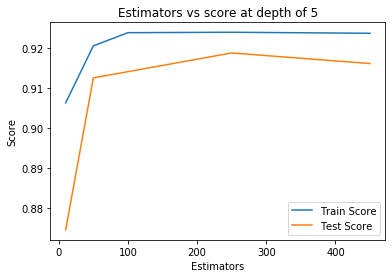

In [13]:
plt.plot(n_esitmators,train_scores,label='Train Score')
plt.plot(n_esitmators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.legend()
plt.title('Estimators vs score at depth of 5')

#### 9.1.2 For depths

In [15]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


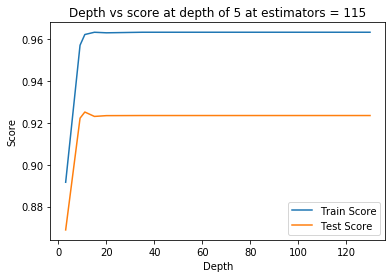

In [16]:
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.legend()
plt.show()

#### 9.1.3 RandomSearchCV

In [17]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
              "n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)
            }

clf = RandomForestClassifier(random_state=0,n_jobs=-1)

In [20]:
rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=5,scoring='f1',random_state=0, return_train_score=True)

In [21]:
rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96341603 0.96062703 0.96218206 0.9621576  0.95996892]
mean train scores [0.96433628 0.96108404 0.96278351 0.96274012 0.96017592]


In [22]:
rf_random.best_params_

{'max_depth': 14,
 'min_samples_leaf': 25,
 'min_samples_split': 177,
 'n_estimators': 108}

#### 9.1.4 Modelling with best model

In [23]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=177,
            min_weight_fraction_leaf=0.0, n_estimators=108, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [25]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9643132637732938
Test f1 score 0.9266062776490415


#### 9.1.5 Confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


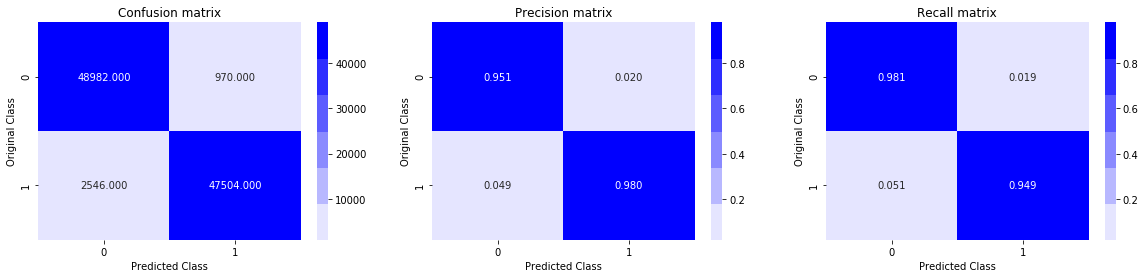

Test confusion_matrix


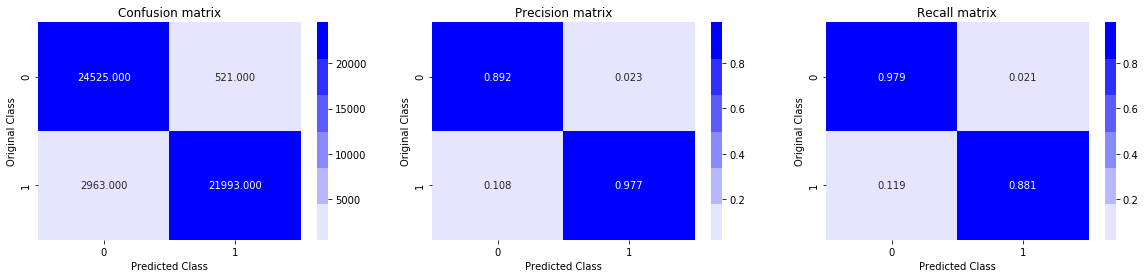

In [27]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

#### 9.1.6 ROC_AUC curve

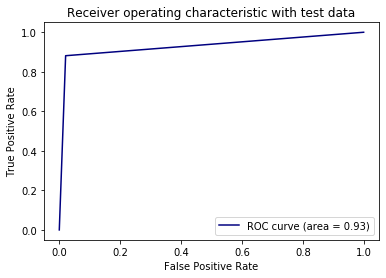

In [28]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, ths = roc_curve(y_test, y_test_pred)
auc_sc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

#### 9.1.7 Feature importance

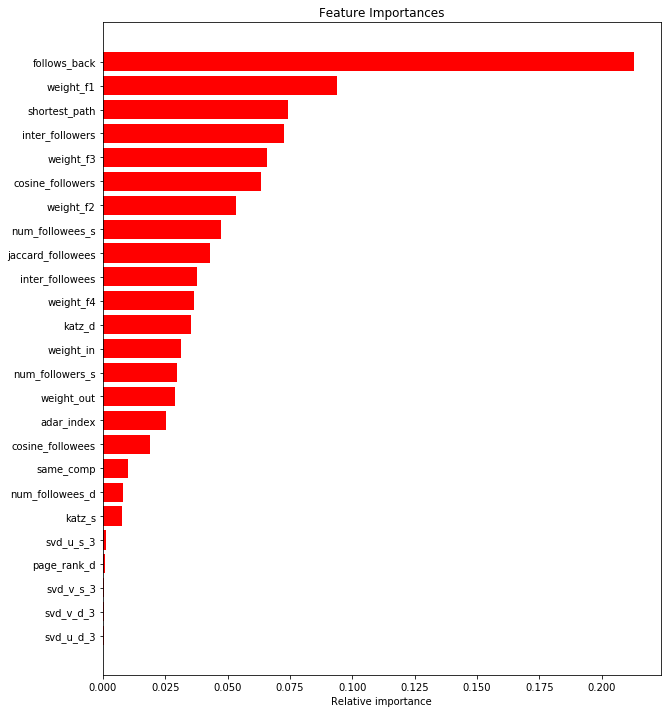

In [32]:
feature = df_final_train.columns
importance = clf.feature_importances_
indices = (np.argsort(importance))[-25:]

plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='r', align='center')
plt.yticks(range(len(indices)), [feature[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

# **10. Assignment :**
1. Preferential Attachment with followers and followees
2. svd_dot --> dot product of source and destination

In [3]:
df_final_train = pd.read_hdf('Copy of storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = pd.read_hdf('Copy of storage_sample_stage4.h5', 'test_df',mode='r')

In [4]:
print(df_final_train.shape)
print(df_final_test.shape)

(100002, 54)
(50002, 54)


In [5]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [6]:
train_graph = nx.read_edgelist('Copy of train_pos_after_eda.csv', delimiter=',', nodetype=int, create_using=nx.DiGraph())

### Note:
- in the given storage_sample_stage4.h5 file the num_followers_d for training as well as testing missed in the dataframe. That's why we find it again down below.

In [7]:
def finding_num_follower_d(final_df):
    num_follower_destination = []
    for i, row in final_df.iterrows():
        try:
            d1 = set(train_graph.predecessors(row['destination_node']))
        except:
            d1 = set()
            
        num_follower_destination.append(len(d1))
        
    return num_follower_destination
df_final_train['num_followers_d'] = finding_num_follower_d(df_final_train)
df_final_test['num_followers_d'] = finding_num_follower_d(df_final_test)

In [8]:
print(df_final_train.shape)
print(df_final_test.shape)

(100002, 55)
(50002, 55)


### 10.1 Preferential Attachment
- Preferential attachment is nothing but in social media the people who have more connections tend to get more connections in the future. So preferential attachment is nothing but multiplication of number of followers in source node and number of followers in destination node
Refer : http://be.amazd.com/link-prediction/


#### 10.1.1 For followers

In [9]:
#training
train_followers_source = np.array(df_final_train['num_followers_s'])
train_followers_destination = np.array(df_final_train['num_followers_d'])

train_followers_pref_attach_score = []
for i in range(len(train_followers_source)):
    train_followers_pref_attach_score.append(train_followers_source[i]*train_followers_destination[i])
    
df_final_train['preferential_attachment_score_followers'] = train_followers_pref_attach_score

In [10]:
#testing
test_followers_source = np.array(df_final_test['num_followers_s'])
test_followers_destination = np.array(df_final_test['num_followers_d'])

test_followers_pref_attach_score = []
for i in range(len(test_followers_source)):
    test_followers_pref_attach_score.append(test_followers_source[i]*test_followers_destination[i])
    
df_final_test['preferential_attachment_score_followers'] = test_followers_pref_attach_score

In [11]:
print(df_final_train.shape)
print(df_final_test.shape)

(100002, 56)
(50002, 56)


#### 10.1.2 For Followees

In [12]:
#it  3-tuples in the form (u, v, p) where (u, v) is a pair of nodes and p is their preferential attachment score.
train_followees_source = np.array(df_final_train['num_followees_s'])
train_followees_destination = np.array(df_final_train['num_followees_d'])

train_followees_pref_attach_score = []
for i in range(len(train_followees_source)):
    train_followees_pref_attach_score.append(train_followees_source[i]*train_followees_destination[i])
    
df_final_train['preferential_attachment_score_followees'] = train_followees_pref_attach_score

In [13]:
#it  3-tuples in the form (u, v, p) where (u, v) is a pair of nodes and p is their preferential attachment score.
test_followees_source = np.array(df_final_test['num_followees_s'])
test_followees_destination = np.array(df_final_test['num_followees_d'])

test_followees_pref_attach_score = []
for i in range(len(test_followees_source)):
    test_followees_pref_attach_score.append(test_followees_source[i]*test_followees_destination[i])
    
df_final_test['preferential_attachment_score_followees'] = test_followees_pref_attach_score

In [14]:
print(df_final_train.shape)
print(df_final_test.shape)

(100002, 57)
(50002, 57)


### 10.2 SVD_dot
- finding dot product b/w svd_source and svd_destination for all 6 keys we found in svd feature
Refer:  https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf

In [16]:
#training
df_final_train['svd_dot_U'] = np.dot(df_final_train['svd_u_s_1'], df_final_train['svd_u_d_1']) + \
                              np.dot(df_final_train['svd_u_s_2'], df_final_train['svd_u_d_2']) + \
                              np.dot(df_final_train['svd_u_s_3'], df_final_train['svd_u_d_3']) + \
                              np.dot(df_final_train['svd_u_s_4'], df_final_train['svd_u_d_4']) + \
                              np.dot(df_final_train['svd_u_s_5'], df_final_train['svd_u_d_5']) + \
                              np.dot(df_final_train['svd_u_s_6'], df_final_train['svd_u_d_6'])

df_final_train['svd_dot_V'] = np.dot(df_final_train['svd_v_s_1'], df_final_train['svd_v_d_1']) + \
                              np.dot(df_final_train['svd_v_s_2'], df_final_train['svd_v_d_2']) + \
                              np.dot(df_final_train['svd_v_s_3'], df_final_train['svd_v_d_3']) + \
                              np.dot(df_final_train['svd_v_s_4'], df_final_train['svd_v_d_4']) + \
                              np.dot(df_final_train['svd_v_s_5'], df_final_train['svd_v_d_5']) + \
                              np.dot(df_final_train['svd_v_s_6'], df_final_train['svd_v_d_6'])
                            

#testing
df_final_test['svd_dot_U'] = np.dot(df_final_test['svd_u_s_1'], df_final_test['svd_u_d_1']) + \
                             np.dot(df_final_test['svd_u_s_2'], df_final_test['svd_u_d_2']) + \
                             np.dot(df_final_test['svd_u_s_3'], df_final_test['svd_u_d_3']) + \
                             np.dot(df_final_test['svd_u_s_4'], df_final_test['svd_u_d_4']) + \
                             np.dot(df_final_test['svd_u_s_5'], df_final_test['svd_u_d_5']) + \
                             np.dot(df_final_test['svd_u_s_6'], df_final_test['svd_u_d_6']) 

df_final_test['svd_dot_V'] = np.dot(df_final_test['svd_v_s_1'], df_final_test['svd_v_d_1']) + \
                             np.dot(df_final_test['svd_v_s_2'], df_final_test['svd_v_d_2']) + \
                             np.dot(df_final_test['svd_v_s_3'], df_final_test['svd_v_d_3']) + \
                             np.dot(df_final_test['svd_v_s_4'], df_final_test['svd_v_d_4']) + \
                             np.dot(df_final_test['svd_v_s_5'], df_final_test['svd_v_d_5']) + \
                             np.dot(df_final_test['svd_v_s_6'], df_final_test['svd_v_d_6'])


In [17]:
print(df_final_train.shape)
print(df_final_test.shape)

(100002, 59)
(50002, 59)


In [21]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'preferential_attachment_score_followers',
       'preferential_attachment_score_followees', 'svd_dot_U',

In [20]:
df_final_test.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'preferential_attachment_score_followers',
       'preferential_attachment_score_followees', 'svd_dot_U',

In [22]:
df_final_train.drop(labels=['svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6', 
                            'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3','svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 
                            'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 
                            'svd_v_d_1','svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'], axis=1, inplace=True)

df_final_test.drop(labels = ['svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
                           'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
                           'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
                           'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
                           'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'], axis=1, inplace=True)

In [23]:
hdf = pd.HDFStore('/home/ubuntu/Project/FB_friend_Recommendation/Copy of storage_sample_stage5.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

In [24]:
y_train = df_final_train['indicator_link']
y_test = df_final_test['indicator_link']

In [25]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [26]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'num_followers_d',
       'preferential_attachment_score_followers',
       'preferential_attachment_score_followees', 'svd_dot_U', 'svd_dot_V'],
      dtype='object')

### 10.3 XGBOOST

In [27]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(df_final_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
              'learning_rate' : [0.1,0.2,0.3],
              'max_depth':[4,5,6,7],
              'n_estimators':[100,200,500,1000],
              'gamma' :[0.1, 0.2, 0.3, 0.4]
}

random_search_CV = RandomizedSearchCV(estimator=clf, param_distributions=parameters, scoring='f1', cv=2, n_jobs=-1, return_train_score=True)

In [29]:
random_search_CV.fit(df_final_train, y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100...
                                           reg_lambda=1, scale_pos_weight=1,
                                           subsample=1, tree_method='exact',
                          

In [30]:
random_search_CV.best_params_

{'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.2}

### 10.4 Modelling with best params

In [31]:
clf = XGBClassifier(learning_rate= 0.2, n_estimators=500, max_depth=6 , gamma=0.2 , n_jobs=-1)
clf.fit(df_final_train, y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [32]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9998001598721024
Test f1 score 0.8973656755346897


### 10.5 Confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    #Precision
    A  = ((C.T)/(C.sum(axis=1))).T
    #Recall
    B = C/C.sum(axis=0)
    
    plt.figure(figsize=(20,4))
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


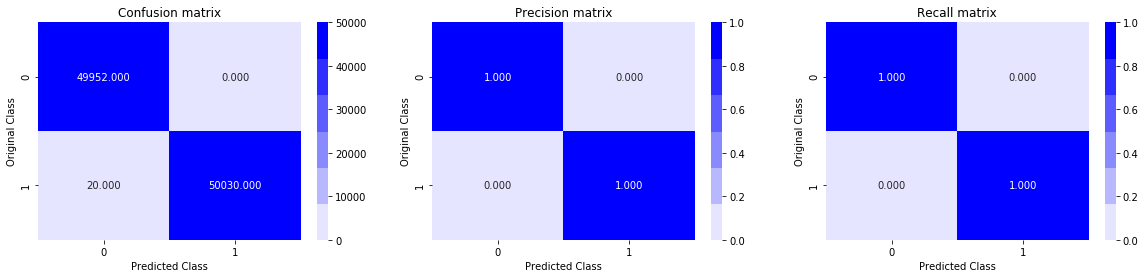

Test confusion_matrix


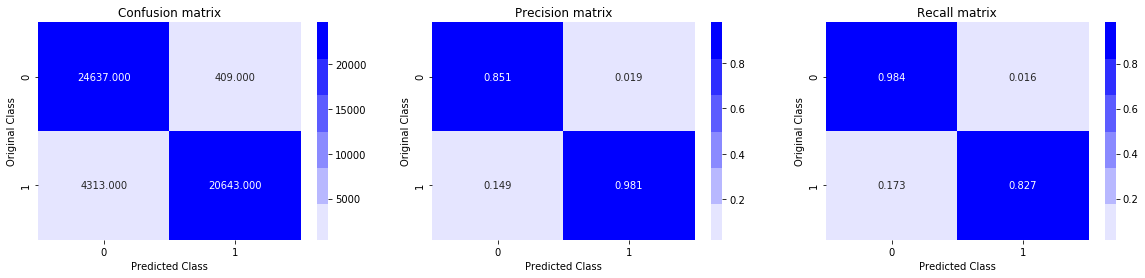

In [34]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

### 10.6 ROC_AUC curve

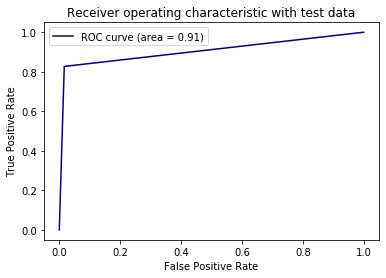

In [35]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresh = roc_curve(y_test, y_test_pred)
auc_score = auc(fpr,tpr)

plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

### 10.7 Feature importance

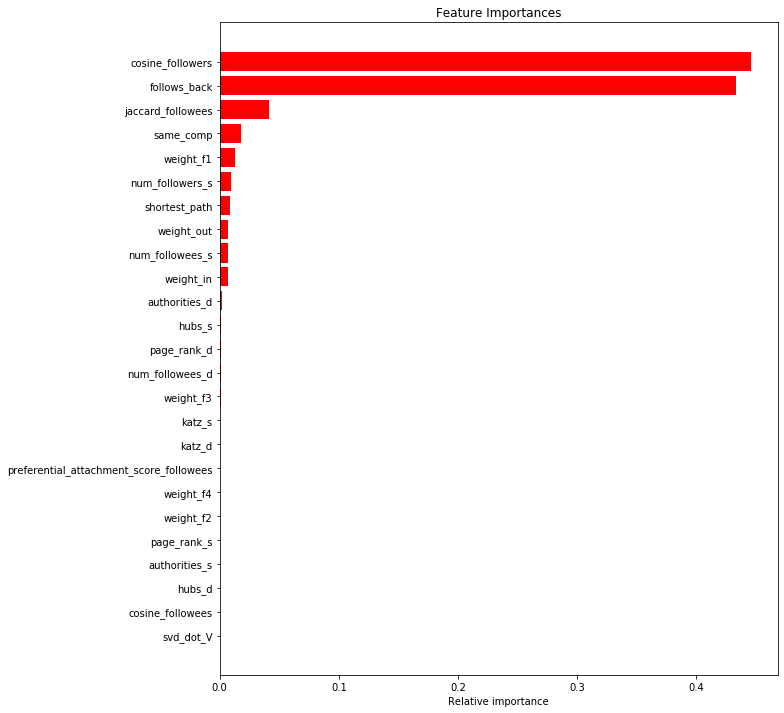

In [36]:
features = df_final_train.columns
importance = clf.feature_importances_
indices = np.argsort(importance)[-25:]

plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i]  for i in indices])
plt.xlabel('Relative importance')
plt.show()

# Summary:

In [37]:
from prettytable import PrettyTable
x =PrettyTable()

x.field_names = ['Model', 'Train f1-score', 'Test f1 score', 'Auc Score', 'Important_feature_1', 'Important_feature_2']
x.add_row(['Random_Forest', '0.96', '0.92', '0.93', 'follows_back', 'weight_f1'])
x.add_row(['XGBoost', '0.99', '0.89', '.91', 'Cosine_Followers', 'Follows back'])
print(x)

+---------------+----------------+---------------+-----------+---------------------+---------------------+
|     Model     | Train f1-score | Test f1 score | Auc Score | Important_feature_1 | Important_feature_2 |
+---------------+----------------+---------------+-----------+---------------------+---------------------+
| Random_Forest |      0.96      |      0.92     |    0.93   |     follows_back    |      weight_f1      |
|    XGBoost    |      0.99      |      0.89     |    .91    |   Cosine_Followers  |     Follows back    |
+---------------+----------------+---------------+-----------+---------------------+---------------------+
